<a href="https://colab.research.google.com/github/sazzad90/ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# data generation
def generateDataset(m):
  X = np.random.randn(m)*10
  noise = np.random.randn(m)
  Y = 3*X + 1 + 5*noise
  return X,Y

In [26]:
X,Y = generateDataset(100)

In [65]:
def plotData(X,Y,color = 'orange', title = 'Data'):
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X,Y,c=color)
  plt.show()

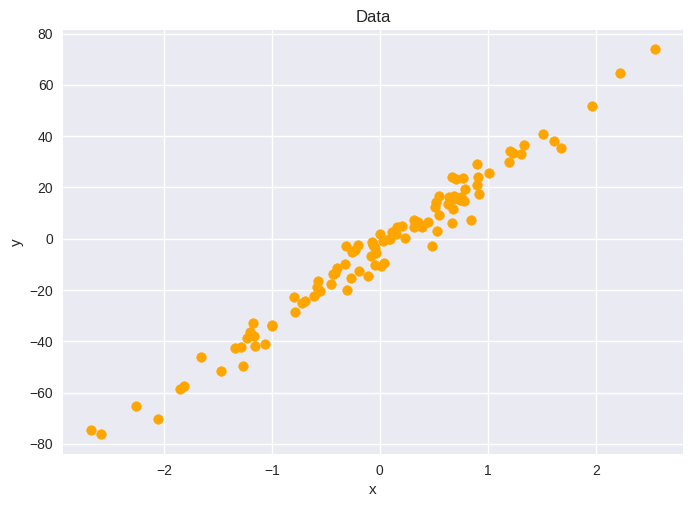

1.0


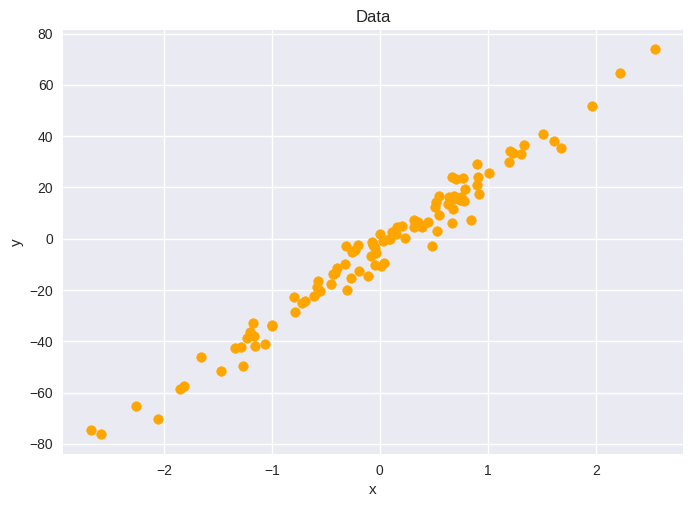

In [66]:
def normalizeData(X):
  X = (X - X.mean())/X.std()
  return X

plotData(X,Y)
X = normalizeData(X)
print(X.std())

plotData(X,Y)


(80,) (80,) (20,) (20,)


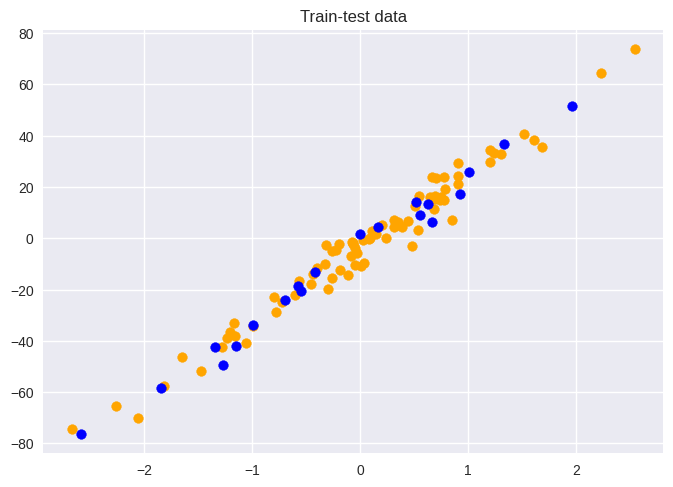

In [67]:
def splitDataset(X,Y,split=0.8):
  m = X.shape[0]

  data = np.zeros((m,2))
  data[:,0] = X
  data[:,1] = Y
  np.random.shuffle(data)

  split = int(m*split)

  XT = data[:split,0]
  YT = data[:split,1]

  Xt = data[split:,0]
  Yt = data[split:,1]

  return XT,YT,Xt,Yt

XT,YT,Xt,Yt = splitDataset(X, Y)
print(XT.shape,YT.shape,Xt.shape,Yt.shape)
plt.scatter(XT,YT,color = 'orange',label = 'Train')
plt.scatter(Xt,Yt,color = 'blue', label = "test")
plt.title('Train-test data')
plt.show()

Theta matrix:  [-3.65852105 28.29782183]


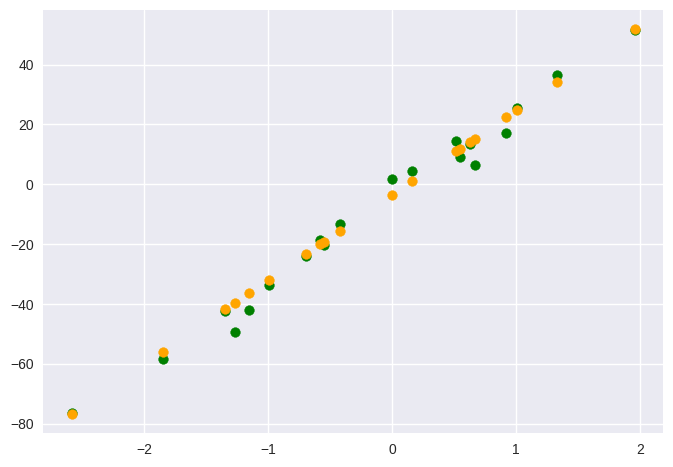

In [68]:
def hypothesis(X,theta):
  return theta[0] + theta[1]*X

def error(X,Y,theta):
  m = X.shape[0]
  e = 0

  for i in range(m):
    e = e + (Y[i] - (hypothesis(X[i], theta)))**2
  return e/(2*m)

def gradient(X, Y, theta):
  m = X.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i], theta) - Y[i]
    grad[0] += (exp)
    grad[1] += (exp)*X[i]

  return grad/m


def train(X, Y, learning_rate = 0.05):
  theta = np.zeros((2,))

  maxIteration = 100
  #error_list = []
  for i in range(maxIteration):
    grad = gradient(X, Y, theta)

    #error_list.append(error(X,Y,theta))

    theta[0] = theta[0] - learning_rate*grad[0]
    theta[1] = theta[1] - learning_rate*grad[1]

  return theta

theta = train(XT,YT)
print("Theta matrix: ", theta)

def predict(X, theta):
  return hypothesis(X, theta)

Yp = predict(Xt, theta)

plt.scatter(Xt,Yt, color='green')
plt.scatter(Xt,Yp, color='orange')
plt.show()

In [63]:
# evaluation
def r2score(Yt, Yp):
  Ymean = Yt.mean()
  num = np.sum((Yt-Yp)**2)
  denom = np.sum((Yt-Ymean)**2)

  return 1-(num/denom)

print("Accuracy: ", r2score(Yt,Yp))

Accuracy:  0.9756774748922384
